# Chapter: Support Vector Machines & Kernel Methods


# Topic: Soft Margin SVM Binary Classification

In [2]:
# read data
import numpy as np

data = np.loadtxt('toyDataset2.csv', delimiter=',')
X = data[:,0:2]; y = data[:,2]

In [3]:
# scale model inputs
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 

In [4]:
# fit SVM model
from sklearn.svm import SVC

model = SVC(kernel='linear', C=100)
model.fit(X_scaled, y)

SVC(C=100, kernel='linear')

In [5]:
# get details of support vectors
print('# of support vectors:', len(model.support_))

# of support vectors: 4


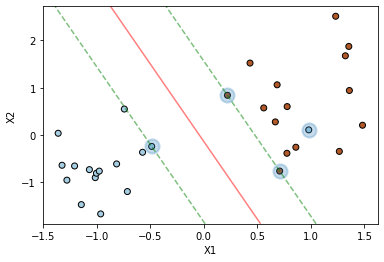

In [6]:
# plot SVM boundaries
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('X1'), plt.ylabel('X2')

# get axis limits
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# plot decision boundary and supporting planes
ax.contour(XX, YY, Z, levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'], colors=['green', 'red', 'green'])

# highlight support vectors
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=200, linewidth=2, alpha=0.25)
plt.show()
